majid bouzar



# Latent Dirichlet Allocation pour des Données Textes

Dans ce TP 

* Appliquer des techniques de prétraitement standard sur les données textuelles Wikipedia en utilisant Pandas
* Utiliser  Gensim pour adapter un modèle d'allocation latente de Dirichlet (LDA)
* Explorer et interpréter les résultats, y compris les mots-clés de sujet et les assignations de sujets pour les documents


## Prétraitement des données texte


In [3]:
import pandas
df = pandas.read_csv('/content/drive/MyDrive/people_wiki.csv')
df

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
42781,<http://dbpedia.org/resource/Motoaki_Takenouchi>,Motoaki Takenouchi,motoaki takenouchi born july 8 1967 saitama pr...
42782,<http://dbpedia.org/resource/Alan_Judge_(footb...,"Alan Judge (footballer, born 1960)",alan graham judge born 14 may 1960 is a retire...
42783,<http://dbpedia.org/resource/Eduardo_Lara>,Eduardo Lara,eduardo lara lozano born 4 september 1959 in c...
42784,<http://dbpedia.org/resource/Tatiana_Faberg%C3...,Tatiana Faberg%C3%A9,tatiana faberg is an author and faberg scholar...


In [5]:
Text = df.drop(columns=['URI', 'name'], axis=1)

In [7]:
# Load the regular expression library
import re
# Remove punctuation
Text['text_processed'] = \
Text['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
Text['text_processed'] = \
Text['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
Text['text_processed'].head()

0    digby morrell born 10 october 1979 is a former...
1    alfred j lewy aka sandy lewy graduated from un...
2    harpdog brown is a singer and harmonica player...
3    franz rottensteiner born in waidmannsfeld lowe...
4    henry krvits born 30 december 1974 in tallinn ...
Name: text_processed, dtype: object

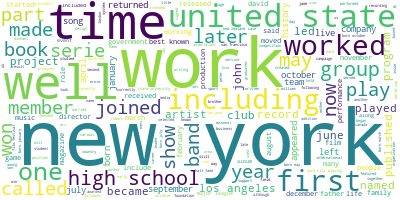

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(Text['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [9]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = Text.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['digby', 'morrell', 'born', 'october', 'former', 'australian', 'rules', 'footballer', 'played', 'kangaroos', 'carlton', 'australian', 'football', 'league', 'aflfrom', 'western', 'australia', 'morrell', 'played', 'early', 'senior', 'football', 'west', 'perth', 'game', 'senior', 'career', 'falcons', 'spanned', 'clubs']


In [10]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 5), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [11]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"book" + 0.007*"published" + 0.007*"new" + 0.007*"work" + 0.006*"art" '
  '+ 0.006*"also" + 0.005*"books" + 0.005*"film" + 0.004*"first" + '
  '0.004*"born"'),
 (1,
  '0.009*"served" + 0.007*"united" + 0.007*"law" + 0.006*"states" + '
  '0.006*"state" + 0.006*"born" + 0.005*"court" + 0.005*"us" + '
  '0.005*"university" + 0.005*"district"'),
 (2,
  '0.007*"member" + 0.007*"party" + 0.006*"new" + 0.005*"also" + '
  '0.005*"minister" + 0.005*"election" + 0.005*"born" + 0.005*"government" + '
  '0.004*"university" + 0.004*"president"'),
 (3,
  '0.022*"university" + 0.007*"research" + 0.007*"professor" + 0.006*"also" + '
  '0.005*"international" + 0.005*"institute" + 0.005*"school" + '
  '0.004*"science" + 0.004*"work" + 0.004*"member"'),
 (4,
  '0.023*"music" + 0.007*"orchestra" + 0.007*"jazz" + 0.006*"also" + '
  '0.006*"opera" + 0.005*"new" + 0.005*"performed" + 0.005*"festival" + '
  '0.005*"born" + 0.004*"band"'),
 (5,
  '0.013*"film" + 0.010*"also" + 0.009*"television" 

In [12]:
def explore_topic(topic_number, topn=50):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in lda_model.show_topic(topic_number, topn):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

In [13]:
explore_topic(1,5)

term                 frequency

served               0.009
united               0.007
law                  0.007
states               0.006
state                0.006


# Identifier lesTopiques par mots-clés




## Question 2: (2 pts)
Quelle est la somme des probabilités assignées aux 50 premiers mots du troisième topique?

In [21]:
s = 0
for term, frequency in lda_model.show_topic(2, 50):
  s += frequency
print(f"Somme des probailités des 50 premiers mots du 3ème Topic : {round(s,3)*100}%")






Somme des probailités des 50 premiers mots du 3ème Topic : 15.4%


Regardons les 10 premiers mots pour chaque topique pour voir si nous pouvons identifier n'importe quels thèmes:

In [36]:
explore_topic(9, topn=10)

term                 frequency

also                 0.005
first                0.005
one                  0.004
born                 0.004
years                0.004
world                0.004
radio                0.003
time                 0.003
known                0.003
later                0.003


Nous proposons les thèmes suivants pour chaque topique:

- topic 0: Music, TV, and film
- topic 1: Team sports
- topic 2: Art and publishing
- topic 3: American college and politics
- topic 4: International athletics
- topic 5: International music 
- topic 6: Science and research 
- topic 7: Business  
- topic 8: Great Britain and Australia  
- topic 9: General politics



In [ ]:
themes = ['Art and publishing','American college and politics','General politics','Science and research','International music','Music, TV, and film', \
         'International athletics','Team sports','Great Britain and Australia','Business']

# Distributions de topique pour certains exemples de documents


LDA se base sur le modèle mixte, ce qui signifie que chaque document peut partiellement appartenir à plusieurs topiques différents. Pour chaque document, l'appartenance à un topic est exprimée sous la forme d'un vecteur de poids égal à un; L'importance de chaque poids indique le degré auquel le document représente ce sujet particulier.

Nous allons explorer cela dans notre modèle  en examinant les distributions des topics pour quelques exemples d'articles Wikipedia de notre ensemble de données. Nous devrions trouver que ces articles ont les poids les plus élevés sur les topics dont les thèmes sont les plus important pour le topique de l'article - par exemple, nous nous attendons d'un article sur un homme de politique d'accorder un poids relativement élevé sur des topiques liés au gouvernement, un article sur un athlète devrait mettre plus de poids sur des topiques liés aux sports...


In [40]:
obama = df [df['name'] == 'Barack Obama']
data1 = obama.text.values.tolist()
data_words1 = list(sent_to_words(data1))
# remove stop words
data_words1 = remove_stopwords(data_words1)
print(data_words1[:1][0][:30])

['barack', 'hussein', 'obama', 'ii', 'brk', 'husen', 'bm', 'born', 'august', 'th', 'current', 'president', 'united', 'states', 'first', 'african', 'american', 'hold', 'office', 'born', 'honolulu', 'hawaii', 'obama', 'graduate', 'columbia', 'university', 'harvard', 'law', 'school', 'served']


In [38]:
   
id2word1 = corpora.Dictionary(data_words1)
# Create Corpus
texts1 = data_words1
# Term Document Frequency
corpus1 = [id2word.doc2bow(text) for text in texts1]
vect=lda_model[corpus1]

vect[0] 

[(1, 0.56757617), (2, 0.4298837)]


## Question 3: (3 pts)

Quel est le topique le plus étroitement lié à l'article sur l'ancien président américain George W. Bush? 

In [67]:
bush = df [df['name'] == 'George W. Bush']
data2 = bush.text.values.tolist()
data_words2 = list(sent_to_words(data2))

data_words2 = remove_stopwords(data_words2)

id2word2 = corpora.Dictionary(data_words2)

texts2 = data_words2

corpus2 = [id2word.doc2bow(text) for text in texts2]
vect=lda_model[corpus2]

vect[0]
def getMaxFreq(dictionary):
    max_value = max(dictionary.values())
    max_word = ''
    for word, freq in dictionary.items():
        if freq == max_value:
            max_word = word
    return max_word, max_value



print(f"Le topique le plus étroitement lié à l'article sur l'ancien président américain George W. Bush : {getMaxFreq(dict(vect[0]))}" )






Le topique le plus étroitement lié à l'article sur l'ancien président américain George W. Bush : (2, 0.558163)


In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    
LDAvis_prepared